# Week 3 Notebook: Exploratory Data Analysis (EDA)
The goal of this week's assignment is to split the dataset into training, validation, and test datasets, conduct exploratory data analysis (EDA) on the training data, and identify issues in the dataset that need to be fixed.

This notebook focuses on exploring our options for handling missing values and understanding our highly correlated independent variables. 

## Import packages

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## Read data as dataframe

In [27]:
#current_dir = os.getcwd()
#parent_dir = os.path.dirname(current_dir)

#data_folder = os.path.join(parent_dir,"data")
#raw_data_folder = os.path.join(data_folder,"raw")

#raw_data_file = os.path.join(raw_data_folder,"rideshare_kaggle.csv")

In [28]:
#df = pd.read_csv(raw_data_file)

In [109]:
# Load the data as a pandas dataframe.
df = pd.read_csv('rideshare_kaggle.csv')
df_uber=pd.read_csv('uber.csv')
df_lyft=pd.read_csv('lyft.csv')

## Generate training, testing, and validation data sets
- training set is 70% of the dataframe
- validation set is 20% of the dataframe
- test set is 10% of the dataframe

In [111]:

#For the uber dataset
df_uber = df_uber.sample(frac=1, random_state=123)

# Calculate the sizes of validation and test sets
val_size = int(len(df_uber) * 0.2)
test_size = int(len(df_uber) * 0.1)

# Select rows based on the val_size and test_size to store as train set, val set, and test set
train_df_uber = df.iloc[val_size + test_size:]
val_df_uber = df.iloc[:val_size]
test_df_uber = df.iloc[val_size:val_size + test_size]

#For the lyft dataset
df_lyft = df_lyft.sample(frac=1, random_state=123)

# Calculate the sizes of validation and test sets
val_size = int(len(df_lyft) * 0.2)
test_size = int(len(df_lyft) * 0.1)

# Select rows based on the val_size and test_size to store as train set, val set, and test set
train_df_uber = df.iloc[val_size + test_size:]
val_df_uber = df.iloc[:val_size]
test_df_uber = df.iloc[val_size:val_size + test_size]

### Check for Data Types

In [113]:
df_uber.dtypes
df_lyft.dtypes

id                              object
timestamp                      float64
hour                             int64
day                              int64
month                            int64
datetime                        object
timezone                        object
source                          object
destination                     object
cab_type                        object
product_id                      object
name                            object
price                          float64
distance                       float64
surge_multiplier               float64
latitude                       float64
longitude                      float64
temperature                    float64
apparentTemperature            float64
short_summary                   object
long_summary                    object
precipIntensity                float64
precipProbability              float64
humidity                       float64
windSpeed                      float64
windGust                 

In [34]:
cat_col = [col for col in df.columns if df[col].dtype == 'object']
cat_col = [
 'timezone',
 'source',
 'destination',
 'cab_type',
 'product_id',
 'name',
 'short_summary',
 'long_summary',
 'icon']
num_col = [col for col in df.columns if col not in cat_col]

print(f"cat_col = {len(cat_col)}\nnum_col = {len(num_col)}\n")

cat_col = 9
num_col = 48



## Missing Values
- The target variable `price` has 55,095 missing values which we need to decide how to deal with in data preparation. 
- We can either impute it or drop the rows.
- Typically, another option is to drop a column if it has too many missing values. Since `price` is our dependent variable, this is not an option. 

In [123]:
df_uber.isnull().sum()


id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

In [125]:
df_lyft.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

Let's take a quick look at rows with missing price.

All 55095 missing price variables are from the uber dataset

In [127]:
df_na = df[df['price'].isna()]

In [39]:
df_na.head()

id     timestamp  hour  day  month  \
159582  dd07caca-ea73-4725-8e50-fad3321be24d  1.543326e+09    13   27     11   
661848  dab5db1f-a5fb-4e35-a3d5-40ab0c2d1c98  1.545030e+09     6   17     12   
77825   dd8d7b61-5113-462e-8504-321b7629185f  1.543513e+09    17   29     11   
180484  604c86db-4113-4249-bfcf-1c2fbc0ce058  1.544918e+09     0   16     12   
163722  52bdcd08-12b8-4d13-af13-42511f03fd17  1.543421e+09    16   28     11   

                   datetime          timezone                   source  \
159582  2018-11-27 13:45:22  America/New_York        Boston University   
661848  2018-12-17 06:55:08  America/New_York       Financial District   
77825   2018-11-29 17:32:58  America/New_York  Northeastern University   
180484  2018-12-16 00:00:14  America/New_York       Financial District   
163722  2018-11-28 16:01:25  America/New_York       Financial District   

              destination cab_type  ... precipIntensityMax uvIndexTime  \
159582   Theatre District     Uber  ...             0.1429  1543338000   
661848          North End     Uber  ...             0.0182  1545066000   
77825            West End     Uber  ...             0.0000  1543510800   
180484      South Station     Uber  ...             0.0074  1544893200   
163722  Boston University     Uber  ...             0.0000  1543420800   

        temperatureMin  temperatureMinTime  temperatureMax  \
159582           36.37          1543377600           47.06   
661848           34.25          1545044400           41.38   
77825            34.83          1543550400           45.03   
180484           39.54          1544929200           54.47   
163722           33.75          1543399200           42.60   

        temperatureMaxTime  apparentTemperatureMin  \
159582          1543320000                   32.40   
661848          1545076800                   28.30   
77825           1543510800                   30.90   
180484          1544896800                   36.46   
163722          1543438800                   29.97   

        apparentTemperatureMinTime  apparentTemperatureMax  \
159582                  1543377600                   44.15   
661848                  1545044400                   35.88   
77825                   1543550400                   38.93   
180484                  1544929200                   53.80   
163722                  1543399200                   36.58   

       apparentTemperatureMaxTime  
159582                 1543320000  
661848                 1545076800  
77825                  1543510800  
180484                 1544896800  
163722                 1543438800  

[5 rows x 57 columns]

In [40]:
# Check the percentage of missing values in 'price'
missing_percentage = df['price'].isna().sum() / len(df) * 100
print(f"Percentage of missing values in 'price': {missing_percentage:.2f}%")

Percentage of missing values in 'price': 7.95%


These 55,095 rows (roughly 8% of the dataframe) with missing values for `price` are one of the major obstacles of this dataset. 

### Missing Values Option 1: 
Remove rows with missing `price` values.

In [43]:
df_dropped = df.dropna(subset=['price'])
print(f"Shape after dropping rows with missing 'price': {df_dropped.shape}")

Shape after dropping rows with missing 'price': (637976, 57)


### Missing Values Option 2: 
Fill missing `price` values with mean, median, or mode.

In [45]:
# Fill with mean
df_filled_mean = df.copy()
df_filled_mean['price'].fillna(df_filled_mean['price'].mean(), inplace=True)

# Fill with median
df_filled_median = df.copy()
df_filled_median['price'].fillna(df_filled_median['price'].median(), inplace=True)

# Fill with mode
df_filled_mode = df.copy()
df_filled_mode['price'].fillna(df_filled_mode['price'].mode()[0], inplace=True)

/var/folders/7g/y70jz2ks10xdctq8v1dd7_qw0000gn/T/ipykernel_98358/1181888224.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filled_mean['price'].fillna(df_filled_mean['price'].mean(), inplace=True)
/var/folders/7g/y70jz2ks10xdctq8v1dd7_qw0000gn/T/ipykernel_98358/1181888224.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on whic

### Visualize the distribution of `price` after each imputation to compare

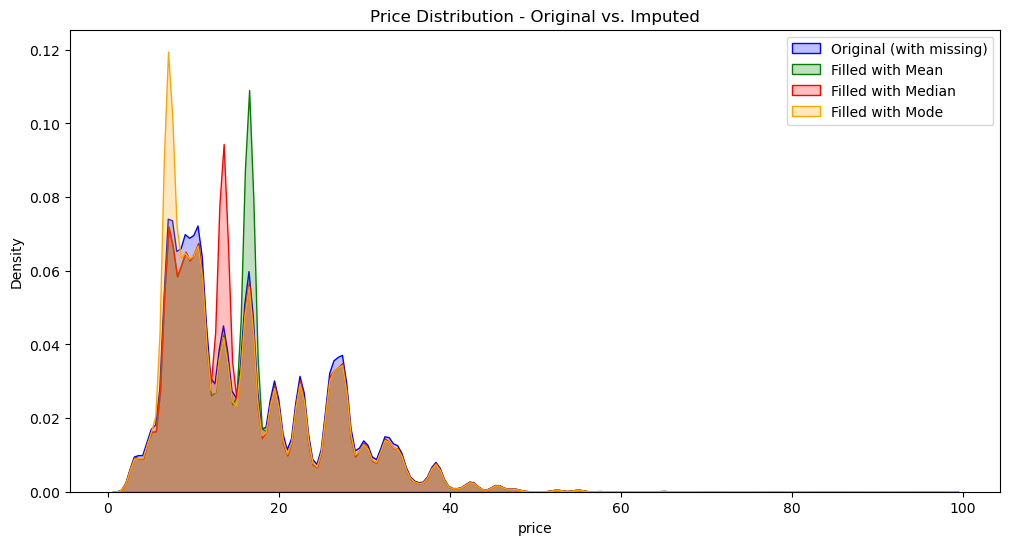

In [47]:
plt.figure(figsize=(12, 6))
sns.kdeplot(df['price'], label='Original (with missing)', color='blue', fill=True)
sns.kdeplot(df_filled_mean['price'], label='Filled with Mean', color='green', fill=True)
sns.kdeplot(df_filled_median['price'], label='Filled with Median', color='red', fill=True)
sns.kdeplot(df_filled_mode['price'], label='Filled with Mode', color='orange', fill=True)

plt.title('Price Distribution - Original vs. Imputed')
plt.legend()
plt.show()

It may also be helpful to try to understand the distribution of the categorical and numerical variables when 'price' is missing.

In [49]:
# Summary statistics for numerical variables when 'price' is missing
print(df_na[num_col].describe())

          timestamp          hour           day         month  price  \
count  5.509500e+04  55095.000000  55095.000000  55095.000000    0.0   
mean   1.544046e+09     11.626191     17.756040     11.588238    NaN   
std    6.890791e+05      6.940503      9.984649      0.492157    NaN   
min    1.543204e+09      0.000000      1.000000     11.000000    NaN   
25%    1.543444e+09      6.000000     13.000000     11.000000    NaN   
50%    1.543739e+09     12.000000     17.000000     12.000000    NaN   
75%    1.544828e+09     18.000000     28.000000     12.000000    NaN   
max    1.545161e+09     23.000000     30.000000     12.000000    NaN   

           distance  surge_multiplier      latitude     longitude  \
count  55095.000000           55095.0  55095.000000  55095.000000   
mean       2.191383               1.0     42.338303    -71.066230   
std        1.178985               0.0      0.047654      0.020286   
min        0.020000               1.0     42.214800    -71.105400   
25%   

In [50]:
# Iterate over each categorical column and print the value counts
for column in cat_col:
    print(f"Counts for {column} when 'price' is missing:")
    print(df_na[column].value_counts())
    print("\n")

Counts for timezone when 'price' is missing:
timezone
America/New_York    55095
Name: count, dtype: int64


Counts for source when 'price' is missing:
source
Financial District         4660
Theatre District           4612
Boston University          4592
Northeastern University    4592
North End                  4592
Back Bay                   4591
Fenway                     4591
South Station              4590
Haymarket Square           4589
West End                   4582
Beacon Hill                4562
North Station              4542
Name: count, dtype: int64


Counts for destination when 'price' is missing:
destination
Financial District         4659
Theatre District           4609
Boston University          4593
Haymarket Square           4593
North End                  4592
Fenway                     4591
South Station              4590
Back Bay                   4590
Northeastern University    4590
West End                   4583
Beacon Hill                4563
North Station     

/var/folders/7g/y70jz2ks10xdctq8v1dd7_qw0000gn/T/ipykernel_98358/2299771276.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cab_type', data=df_na, palette='Set2')


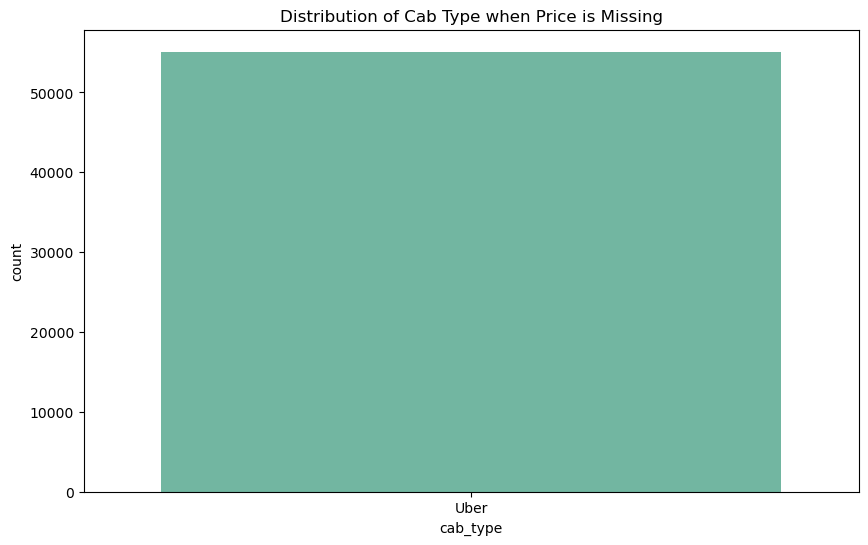

/var/folders/7g/y70jz2ks10xdctq8v1dd7_qw0000gn/T/ipykernel_98358/2299771276.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='source', data=df_na, palette='Set2', order=df_na['source'].value_counts().index)


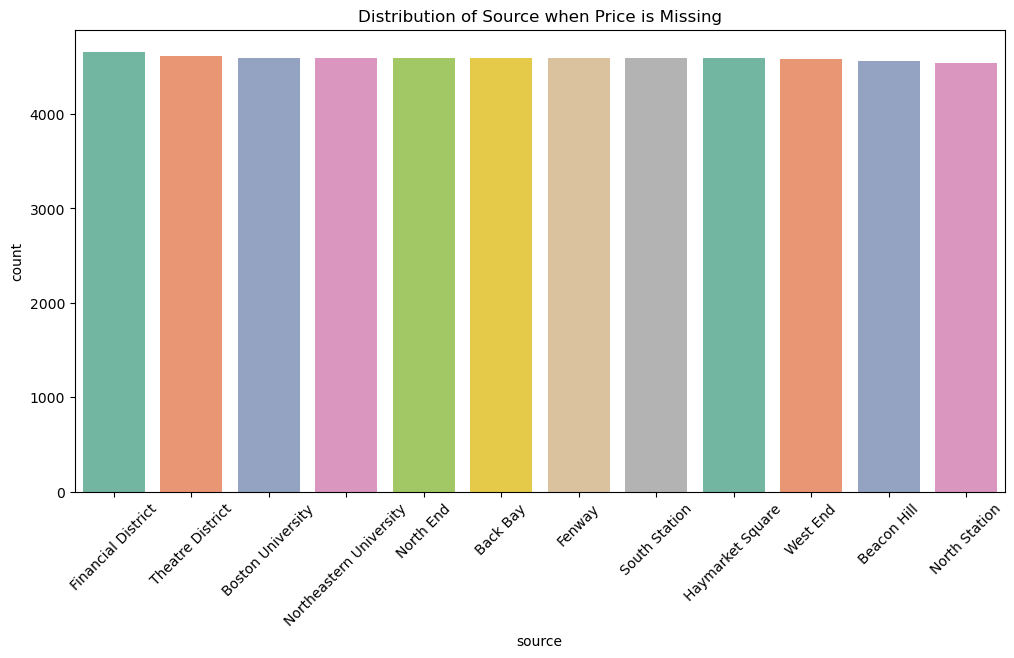

/var/folders/7g/y70jz2ks10xdctq8v1dd7_qw0000gn/T/ipykernel_98358/2299771276.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='destination', data=df_na, palette='Set2', order=df_na['destination'].value_counts().index)


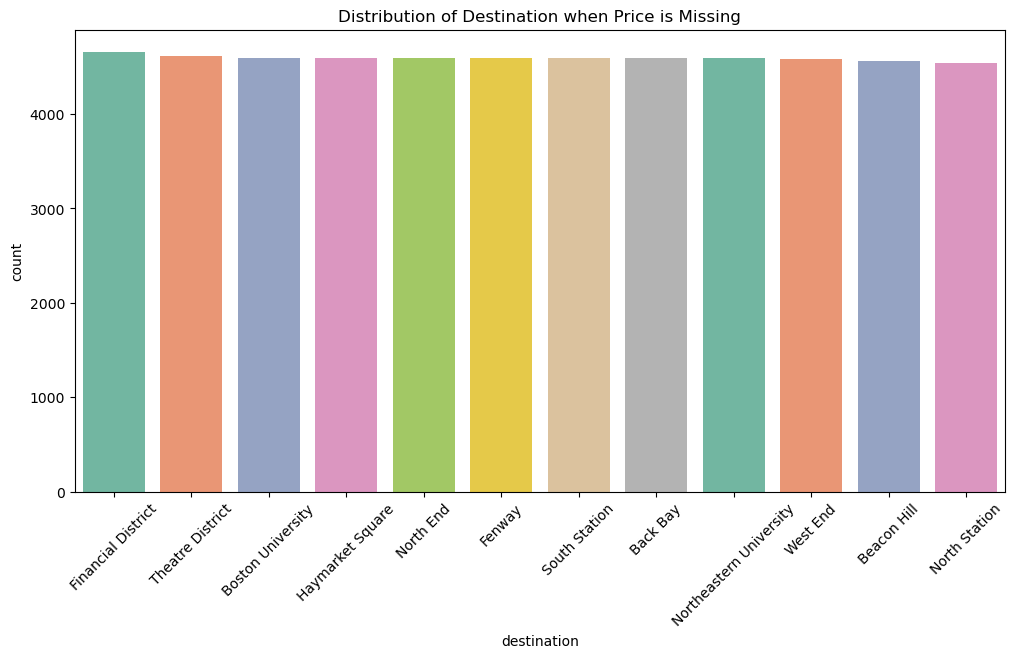

/var/folders/7g/y70jz2ks10xdctq8v1dd7_qw0000gn/T/ipykernel_98358/2299771276.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='product_id', data=df_na, palette='Set2', order=df_na['product_id'].value_counts().index)


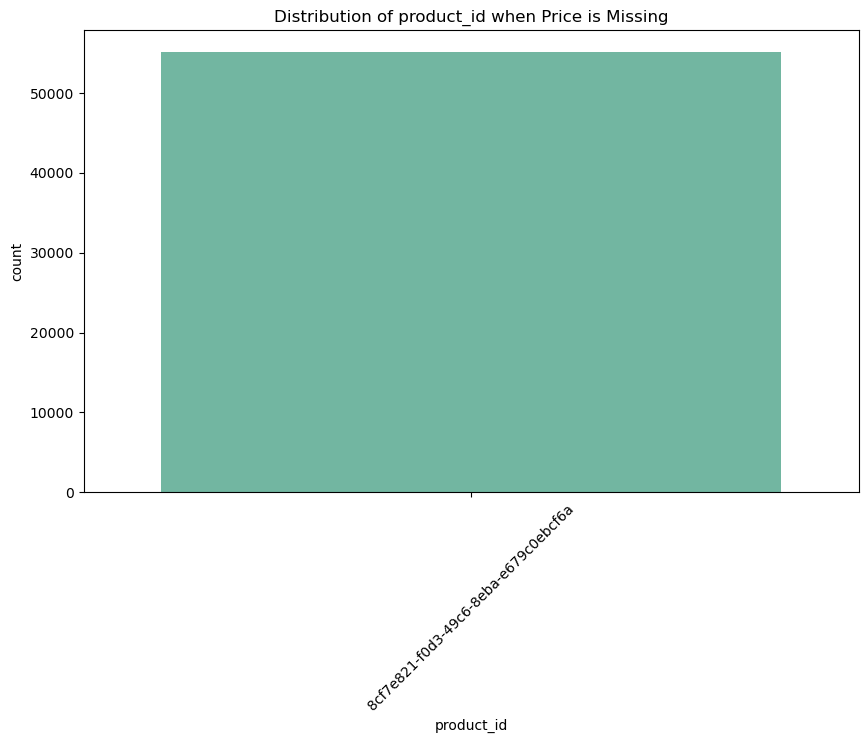

/var/folders/7g/y70jz2ks10xdctq8v1dd7_qw0000gn/T/ipykernel_98358/2299771276.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='name', data=df_na, palette='Set2', order=df_na['name'].value_counts().index)


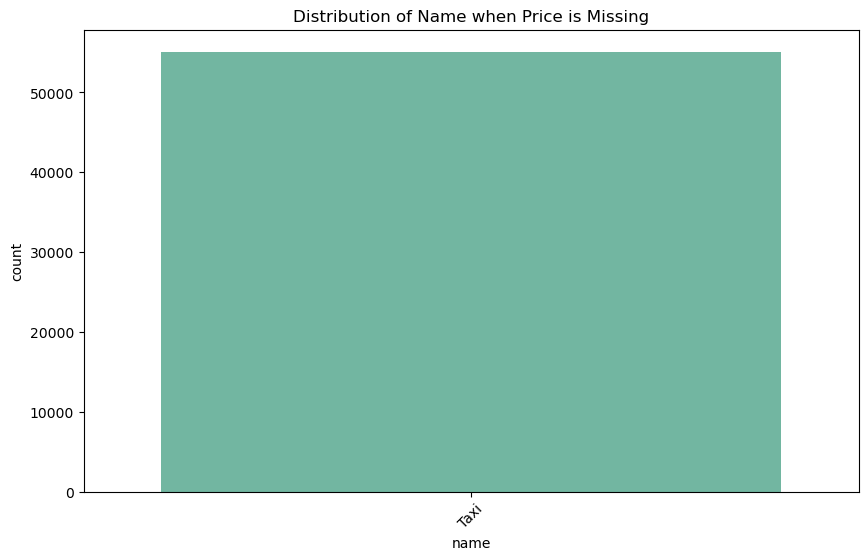

In [51]:
# Distribution of 'cab_type' when 'price' is missing
plt.figure(figsize=(10, 6))
sns.countplot(x='cab_type', data=df_na, palette='Set2')
plt.title('Distribution of Cab Type when Price is Missing')
plt.show()

# Distribution of 'source' when 'price' is missing
plt.figure(figsize=(12, 6))
sns.countplot(x='source', data=df_na, palette='Set2', order=df_na['source'].value_counts().index)
plt.title('Distribution of Source when Price is Missing')
plt.xticks(rotation=45)
plt.show()

# Distribution of 'destination' when 'price' is missing
plt.figure(figsize=(12, 6))
sns.countplot(x='destination', data=df_na, palette='Set2', order=df_na['destination'].value_counts().index)
plt.title('Distribution of Destination when Price is Missing')
plt.xticks(rotation=45)
plt.show()

# Distribution of 'product_id' when 'price' is missing
plt.figure(figsize=(10, 6))
sns.countplot(x='product_id', data=df_na, palette='Set2', order=df_na['product_id'].value_counts().index)
plt.title('Distribution of product_id when Price is Missing')
plt.xticks(rotation=45)
plt.show()

# Distribution of 'name' when 'price' is missing
plt.figure(figsize=(10, 6))
sns.countplot(x='name', data=df_na, palette='Set2', order=df_na['name'].value_counts().index)
plt.title('Distribution of Name when Price is Missing')
plt.xticks(rotation=45)
plt.show()

The histograms above show:
- there are no missing values for Lyft; there are only missing values for Uber. 
- the distibutions of `source` and `destination` when `price` is missing are very evenly spread; there are almost exactly the same number of observations missing `price` for every individual `source` and `destination`.
- the value of `name` for all missing values is 'Taxi'. For `name`, the unique classes are: ['Shared' 'Lux' 'Lyft' 'Lux Black XL' 'Lyft XL' 'Lux Black' 'UberXL' 'Black' 'UberX' 'WAV' 'Black SUV' 'UberPool' 'Taxi'].
- the value `product_id` is '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a' for all missing values of `price`.

These final two observations are very interesting; we are unsure what the category 'Taxi' implies or what the given `product_id` means.

Instead of options 1 and 2 above, another option to move forward might be to remove all observations where the variable `name` is equal to 'Taxi'. 

### Missing Values Option 3: Remove all observations where variable `name` is equal to 'Taxi'.

In [54]:
# Remove rows where 'name' is 'Taxi'
df_noTaxi = df[df['name'] != 'Taxi']

# Check the result
print(f"Number of rows after removing 'Taxi': {len(df_noTaxi)}")

Number of rows after removing 'Taxi': 637976


In [55]:
# Confirm that this leaves no missing values.
df_noTaxi.isnull().sum()

id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

In [137]:
df_uber.describe()

timestamp           hour            day          month  \
count  3.856630e+05  385663.000000  385663.000000  385663.000000   
mean   1.544046e+09      11.611339      17.811014      11.586344   
std    6.896209e+05       6.942097       9.974964       0.492489   
min    1.543204e+09       0.000000       1.000000      11.000000   
25%    1.543444e+09       6.000000      13.000000      11.000000   
50%    1.543737e+09      12.000000      17.000000      12.000000   
75%    1.544828e+09      18.000000      28.000000      12.000000   
max    1.545161e+09      23.000000      30.000000      12.000000   

               price       distance  surge_multiplier       latitude  \
count  330568.000000  385663.000000          385663.0  385663.000000   
mean       15.795343       2.191386               1.0      42.338014   
std         8.560300       1.178973               0.0       0.048001   
min         4.500000       0.020000               1.0      42.214800   
25%         9.000000       1.300000               1.0      42.350300   
50%        12.500000       2.170000               1.0      42.351900   
75%        21.500000       2.840000               1.0      42.364700   
max        89.500000       7.860000               1.0      42.366100   

           longitude    temperature  ...  precipIntensityMax   uvIndexTime  \
count  385663.000000  385663.000000  ...       385663.000000  3.856630e+05   
mean      -71.066121      39.574827  ...            0.037363  1.544045e+09   
std         0.020319       6.722616  ...            0.055201  6.916629e+05   
min       -71.105400      18.910000  ...            0.000000  1.543162e+09   
25%       -71.081000      36.500000  ...            0.000000  1.543421e+09   
50%       -71.063100      40.490000  ...            0.000400  1.543770e+09   
75%       -71.054200      43.580000  ...            0.091600  1.544807e+09   
max       -71.033000      57.220000  ...            0.145900  1.545152e+09   

       temperatureMin  temperatureMinTime  temperatureMax  temperatureMaxTime  \
count   385663.000000        3.856630e+05   385663.000000        3.856630e+05   
mean        33.450563        1.544042e+09       45.246955        1.544048e+09   
std          6.471418        6.906665e+05        5.641402        6.905871e+05   
min         15.630000        1.543122e+09       33.510000        1.543154e+09   
25%         30.170000        1.543399e+09       42.570000        1.543439e+09   
50%         34.240000        1.543727e+09       44.660000        1.543788e+09   
75%         38.880000        1.544789e+09       46.910000        1.544814e+09   
max         43.100000        1.545192e+09       57.870000        1.545109e+09   

       apparentTemperatureMin  apparentTemperatureMinTime  \
count           385663.000000                3.856630e+05   
mean                29.716968                1.544049e+09   
std                  7.117767                6.875846e+05   
min                 11.810000                1.543136e+09   
25%                 27.760000                1.543399e+09   
50%                 30.130000                1.543745e+09   
75%                 35.710000                1.544789e+09   
max                 40.050000                1.545134e+09   

       apparentTemperatureMax  apparentTemperatureMaxTime  
count           385663.000000                3.856630e+05  
mean                41.976659                1.544049e+09  
std                  6.933250                6.915221e+05  
min                 28.950000                1.543187e+09  
25%                 36.570000                1.543439e+09  
50%                 40.950000                1.543788e+09  
75%                 44.090000                1.544818e+09  
max                 57.200000                1.545109e+09  

[8 rows x 46 columns]

In [139]:
df_lyft.describe()

timestamp           hour            day          month  \
count  3.074080e+05  307408.000000  307408.000000  307408.000000   
mean   1.544045e+09      11.628920      17.773477      11.587112   
std    6.886552e+05       6.955654       9.991441       0.492354   
min    1.543204e+09       0.000000       1.000000      11.000000   
25%    1.543444e+09       6.000000      13.000000      11.000000   
50%    1.543738e+09      12.000000      17.000000      12.000000   
75%    1.544826e+09      18.000000      28.000000      12.000000   
max    1.545161e+09      23.000000      30.000000      12.000000   

               price       distance  surge_multiplier       latitude  \
count  307408.000000  307408.000000      307408.00000  307408.000000   
mean       17.351396       2.186976           1.03127      42.338371   
std        10.019171       1.086622           0.13561       0.047636   
min         2.500000       0.390000           1.00000      42.214800   
25%         9.000000       1.270000           1.00000      42.350300   
50%        16.500000       2.140000           1.00000      42.351900   
75%        22.500000       2.970000           1.00000      42.364700   
max        97.500000       6.330000           3.00000      42.366100   

           longitude    temperature  ...  precipIntensityMax   uvIndexTime  \
count  307408.000000  307408.000000  ...       307408.000000  3.074080e+05   
mean      -71.066188      39.596384  ...            0.037389  1.544043e+09   
std         0.020281       6.730425  ...            0.055230  6.906255e+05   
min       -71.105400      18.910000  ...            0.000000  1.543162e+09   
25%       -71.081000      36.450000  ...            0.000000  1.543421e+09   
50%       -71.063100      40.490000  ...            0.000400  1.543770e+09   
75%       -71.054200      43.580000  ...            0.091600  1.544807e+09   
max       -71.033000      57.220000  ...            0.145900  1.545152e+09   

       temperatureMin  temperatureMinTime  temperatureMax  temperatureMaxTime  \
count   307408.000000        3.074080e+05   307408.000000        3.074080e+05   
mean        33.466821        1.544041e+09       45.279326        1.544047e+09   
std          6.461957        6.896044e+05        5.649572        6.895687e+05   
min         15.630000        1.543122e+09       33.510000        1.543154e+09   
25%         30.170000        1.543399e+09       42.570000        1.543439e+09   
50%         34.240000        1.543727e+09       44.680000        1.543788e+09   
75%         38.880000        1.544789e+09       46.910000        1.544814e+09   
max         43.100000        1.545192e+09       57.870000        1.545109e+09   

       apparentTemperatureMin  apparentTemperatureMinTime  \
count           307408.000000                3.074080e+05   
mean                29.748608                1.544047e+09   
std                  7.101331                6.866865e+05   
min                 11.810000                1.543136e+09   
25%                 27.760000                1.543399e+09   
50%                 30.130000                1.543745e+09   
75%                 35.710000                1.544789e+09   
max                 40.050000                1.545134e+09   

       apparentTemperatureMax  apparentTemperatureMaxTime  
count           307408.000000                3.074080e+05  
mean                42.023292                1.544047e+09  
std                  6.941267                6.905202e+05  
min                 28.950000                1.543187e+09  
25%                 36.570000                1.543439e+09  
50%                 40.950000                1.543788e+09  
75%                 44.120000                1.544818e+09  
max                 57.200000                1.545109e+09  

[8 rows x 46 columns]

The average lyft price is $1.55 higher than the average uber price

### Distrubution
#### Visualize Numerical Variables (Continuous)

In [143]:
discrete_variables= ['hour','day','month','uvIndex']
continuous_variables_uber = [col for col in num_col if col not in discrete_variables]


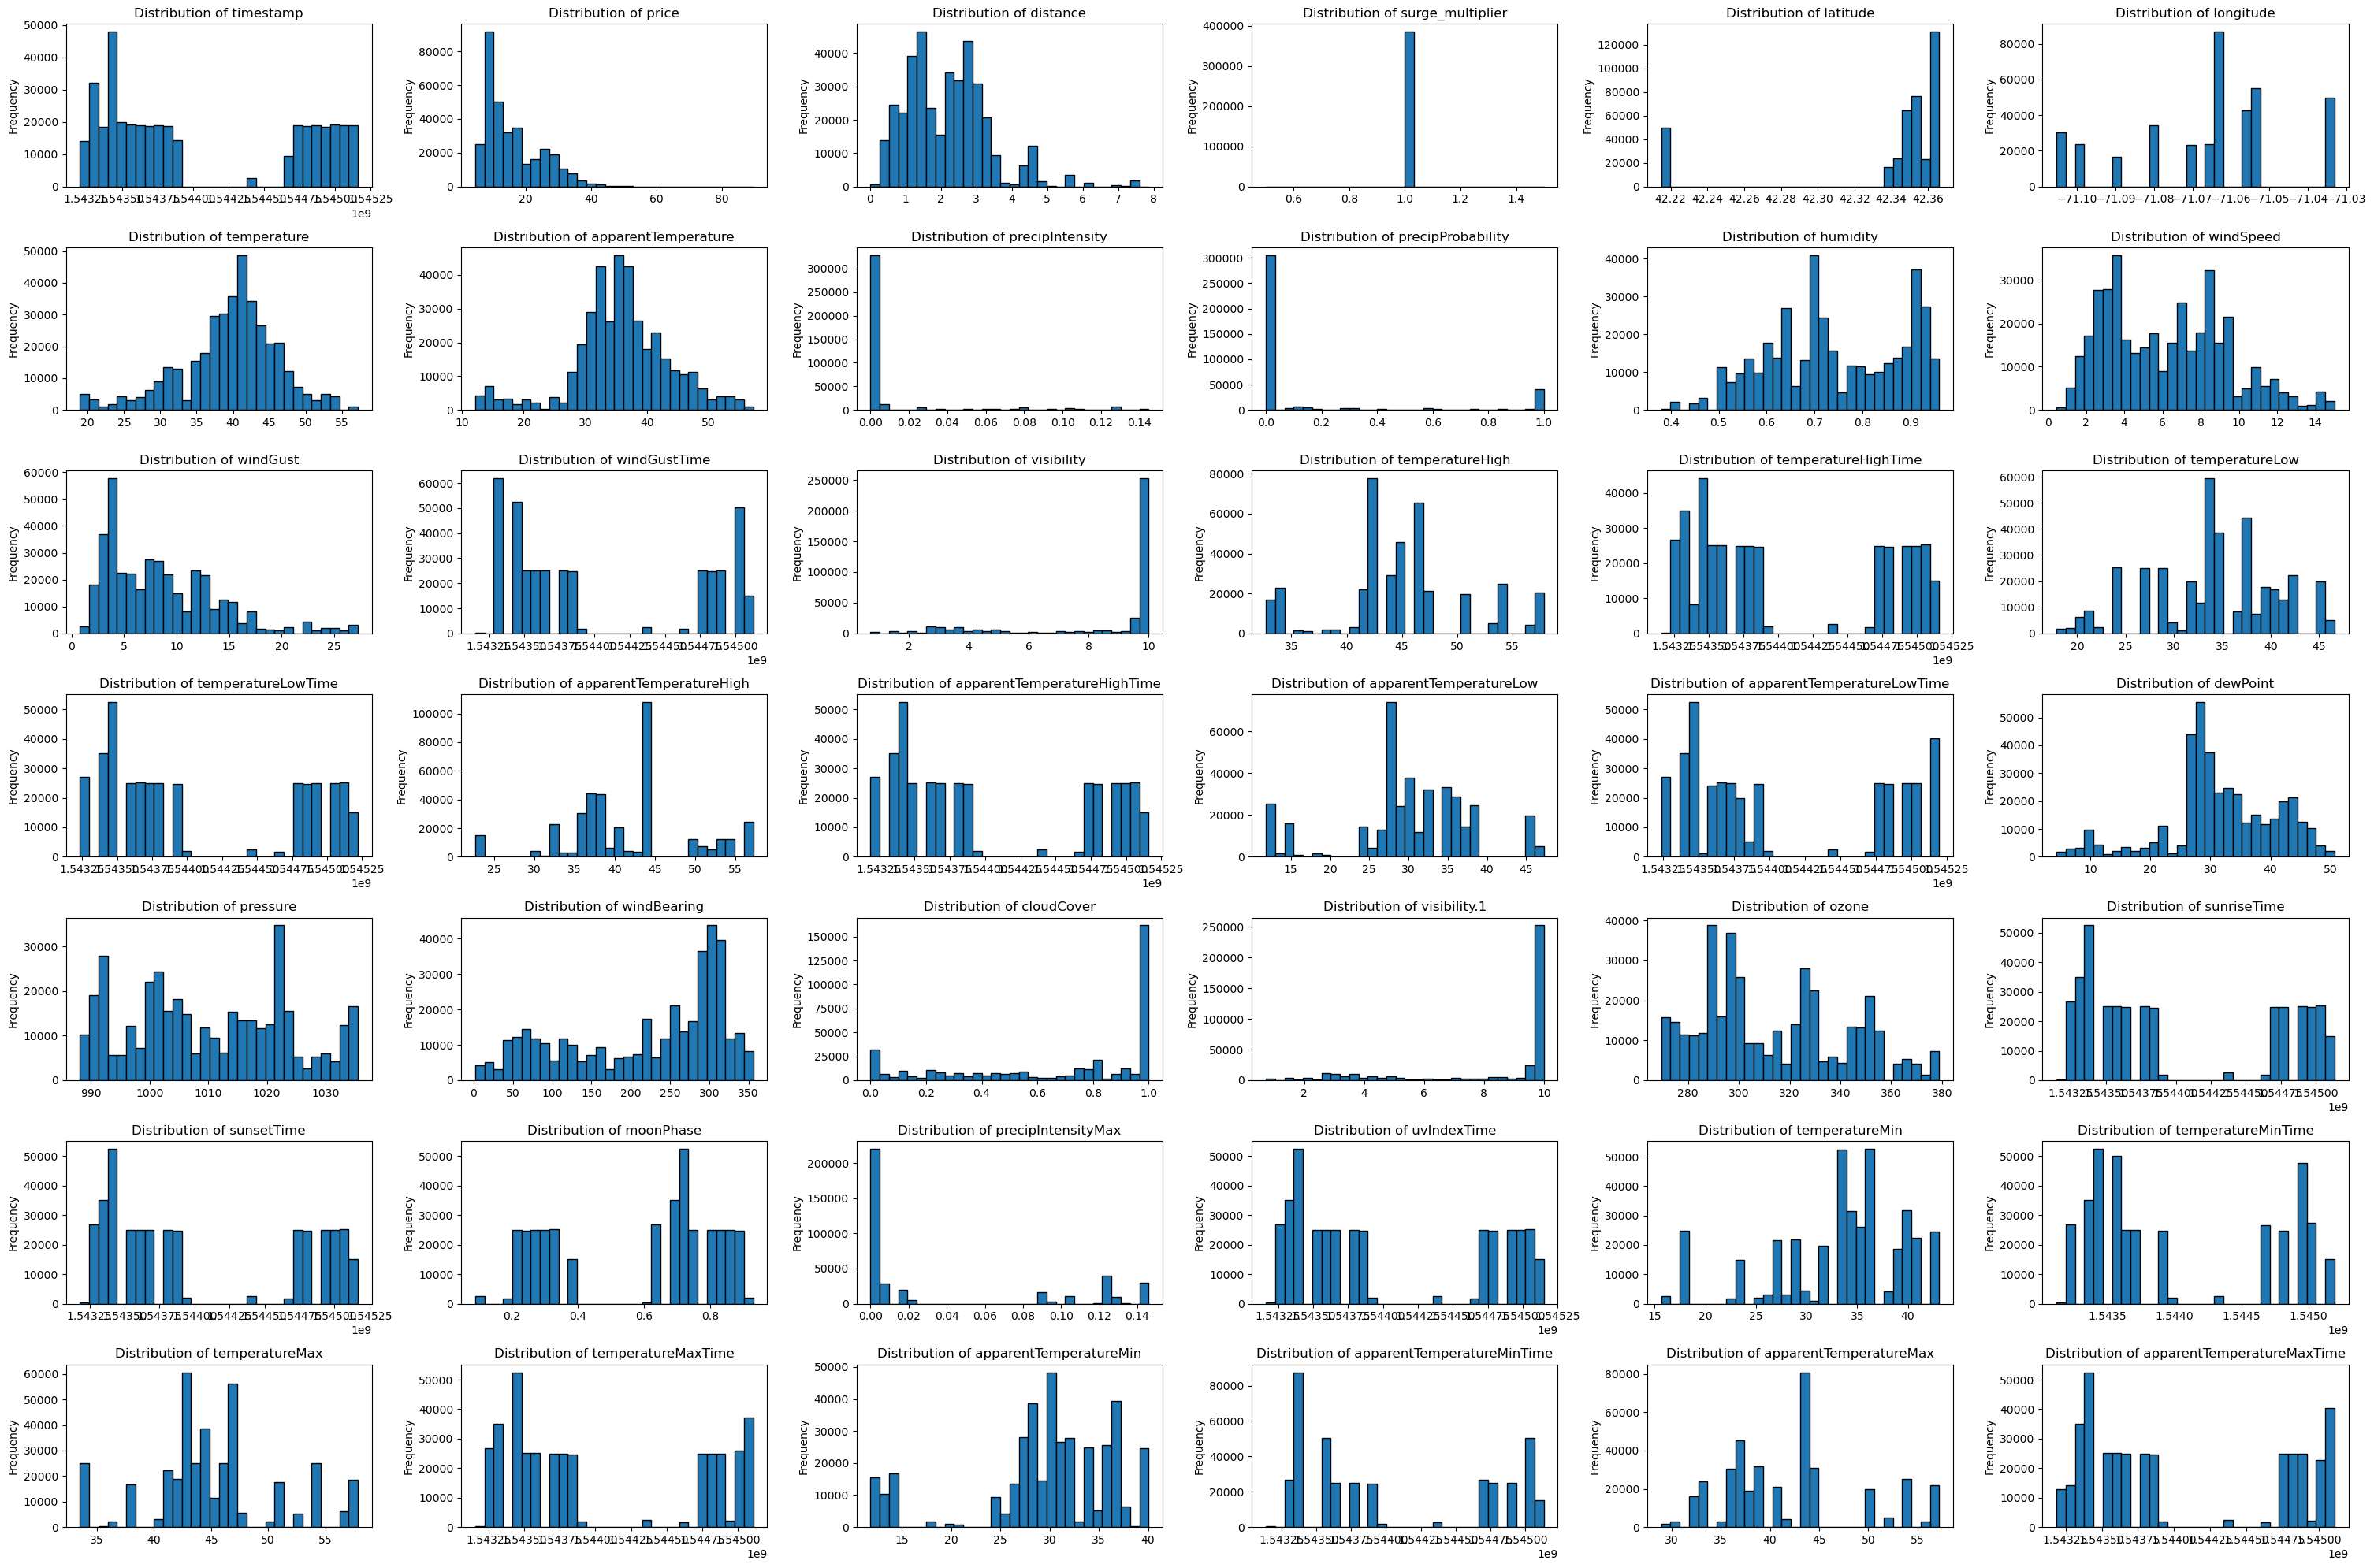

In [147]:
plt.figure(figsize=(30, 20))
for i, col in enumerate(continuous_variables, 1):
    plt.subplot(7, 6, i)
    plt.hist(df_uber[col], bins=30, edgecolor='black')  # Plot histogram using matplotlib
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

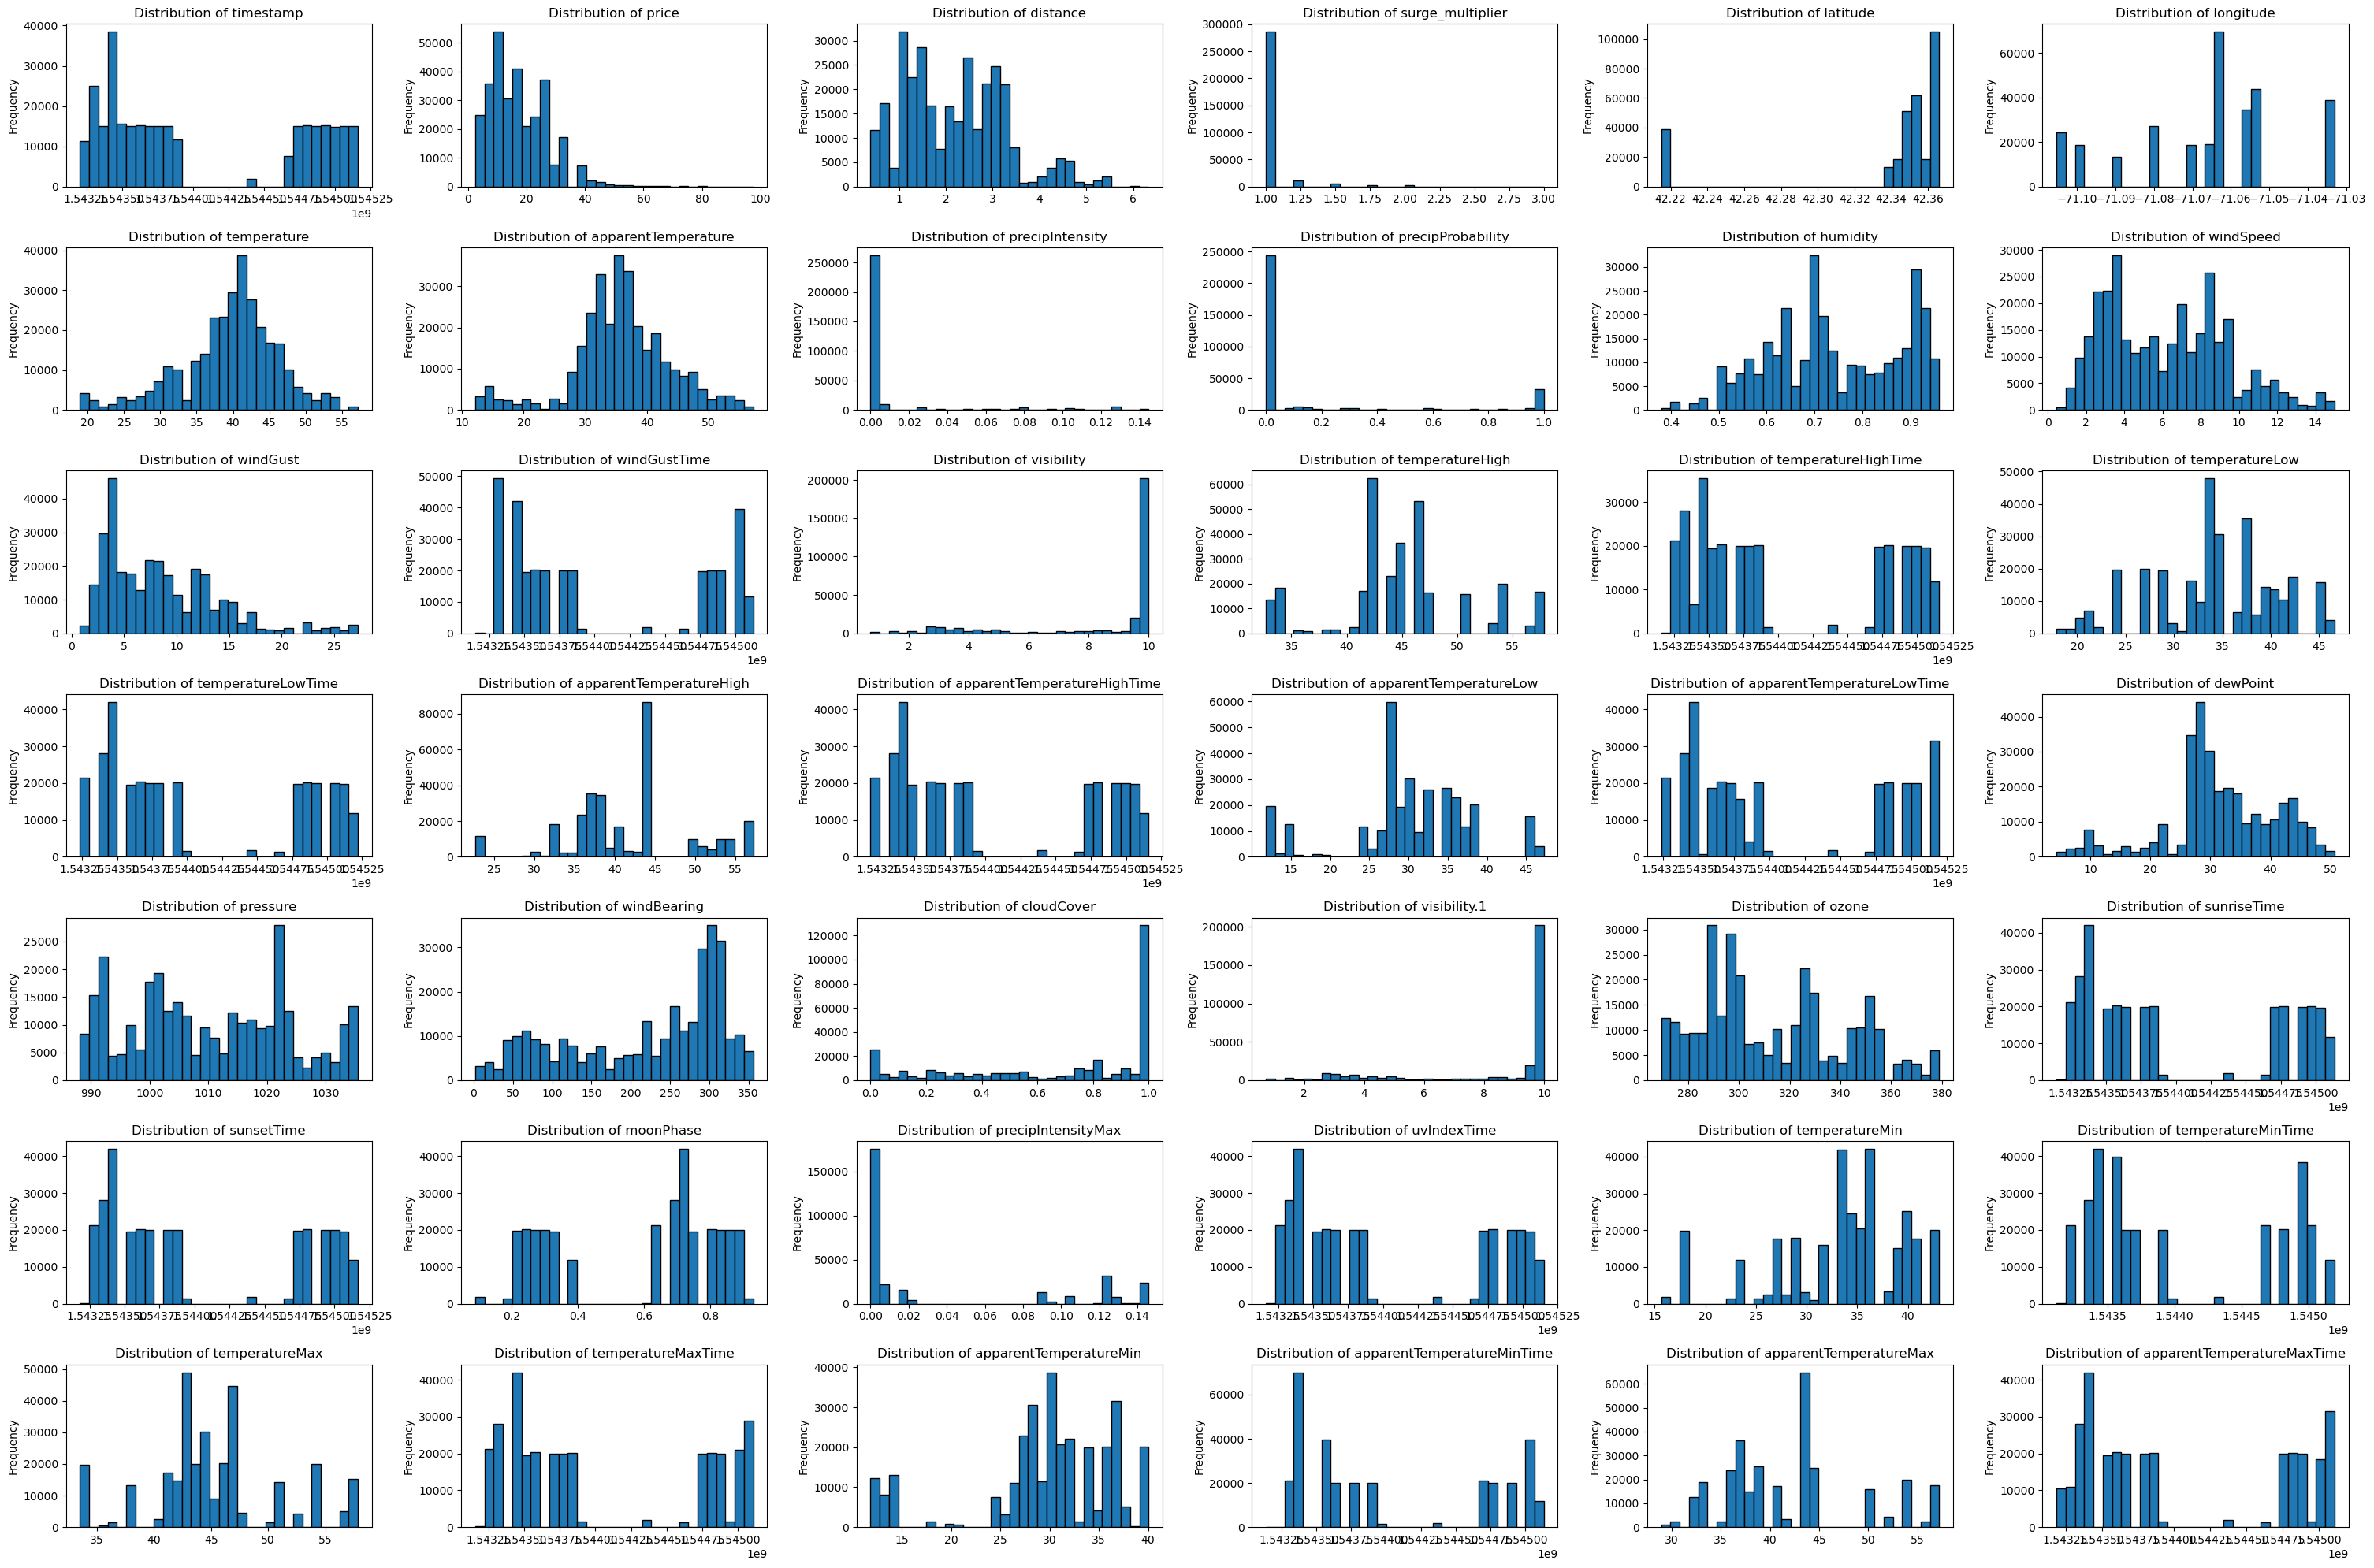

In [149]:
plt.figure(figsize=(30, 20))
for i, col in enumerate(continuous_variables, 1):
    plt.subplot(7, 6, i)
    plt.hist(df_lyft[col], bins=30, edgecolor='black')  # Plot histogram using matplotlib
    plt.title(f'Distribution of {col}')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

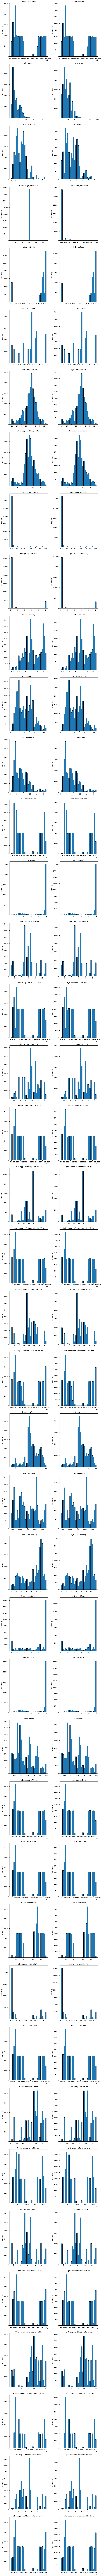

In [207]:
# Set figure size for taller plots (adjust height as needed)
plt.figure(figsize=(10, len(continuous_variables) * 6))  # Increased height for taller plots

for i, col in enumerate(continuous_variables, 1):
    # Uber plot on the left
    plt.subplot(len(continuous_variables), 2, 2*i-1) 
    plt.hist(df_uber[col], bins=30, edgecolor='black') 
    plt.title(f'Uber: {col}')
    plt.ylabel('Frequency')

    # Lyft plot on the right
    plt.subplot(len(continuous_variables), 2, 2*i) 
    plt.hist(df_lyft[col], bins=30, edgecolor='black')
    plt.title(f'Lyft: {col}')
    plt.ylabel('Frequency')

# Add tight layout
plt.tight_layout()
plt.show()

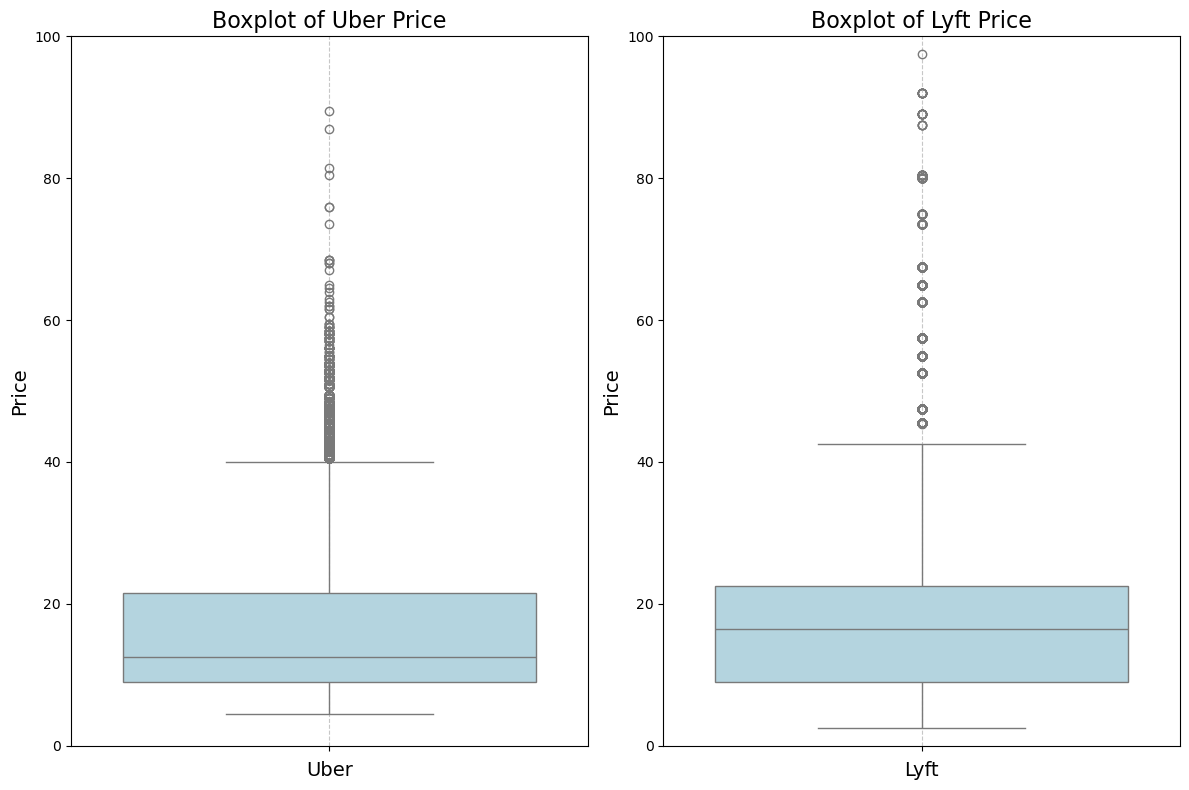

In [198]:

plt.figure(figsize=(12, 8))

# Boxplot for Uber prices
plt.subplot(1, 2, 1)
sns.boxplot(y=df_uber['price'], color='lightblue')
plt.title('Boxplot of Uber Price', fontsize=16)
plt.ylabel('Price', fontsize=14)
plt.ylim(0,100)
plt.xlabel('Uber', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Boxplot for Lyft prices
plt.subplot(1, 2, 2)
sns.boxplot(y=df_lyft['price'], color='lightblue')
plt.title('Boxplot of Lyft Price', fontsize=16)
plt.ylabel('Price', fontsize=14)
plt.ylim(0,100)
plt.xlabel('Lyft', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

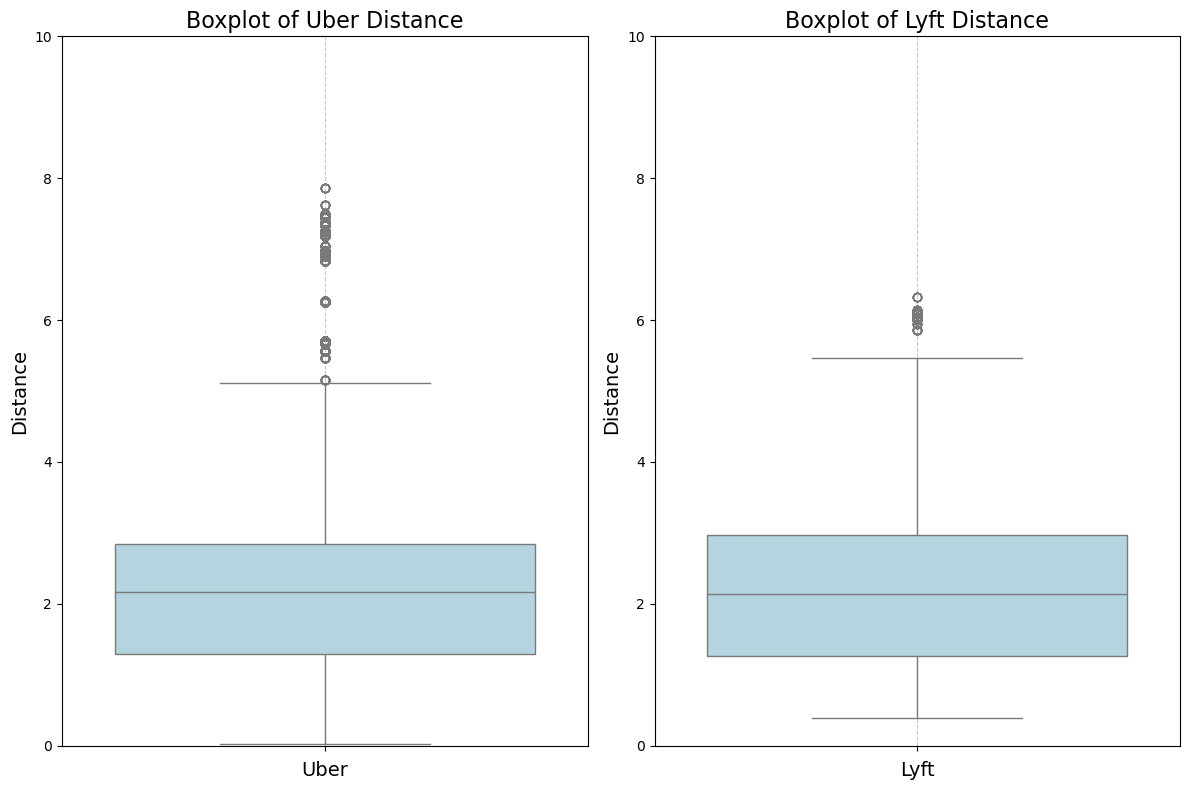

In [204]:

plt.figure(figsize=(12, 8))

# Boxplot for Uber prices
plt.subplot(1, 2, 1)
sns.boxplot(y=df_uber['distance'], color='lightblue')
plt.title('Boxplot of Uber Distance', fontsize=16)
plt.ylabel('Distance', fontsize=14)
plt.ylim(0,10)
plt.xlabel('Uber', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

# Boxplot for Lyft prices
plt.subplot(1, 2, 2)
sns.boxplot(y=df_lyft['distance'], color='lightblue')
plt.title('Boxplot of Lyft Distance', fontsize=16)
plt.ylabel('Distance', fontsize=14)
plt.ylim(0,10)
plt.xlabel('Lyft', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Correlation analysis

In [145]:
# Remove 'id' and 'datetime' from the list of column names
num_col = [col for col in num_col if col not in ['id', 'datetime']]

num_df = df[num_col]
correlation_matrix = num_df.corr()

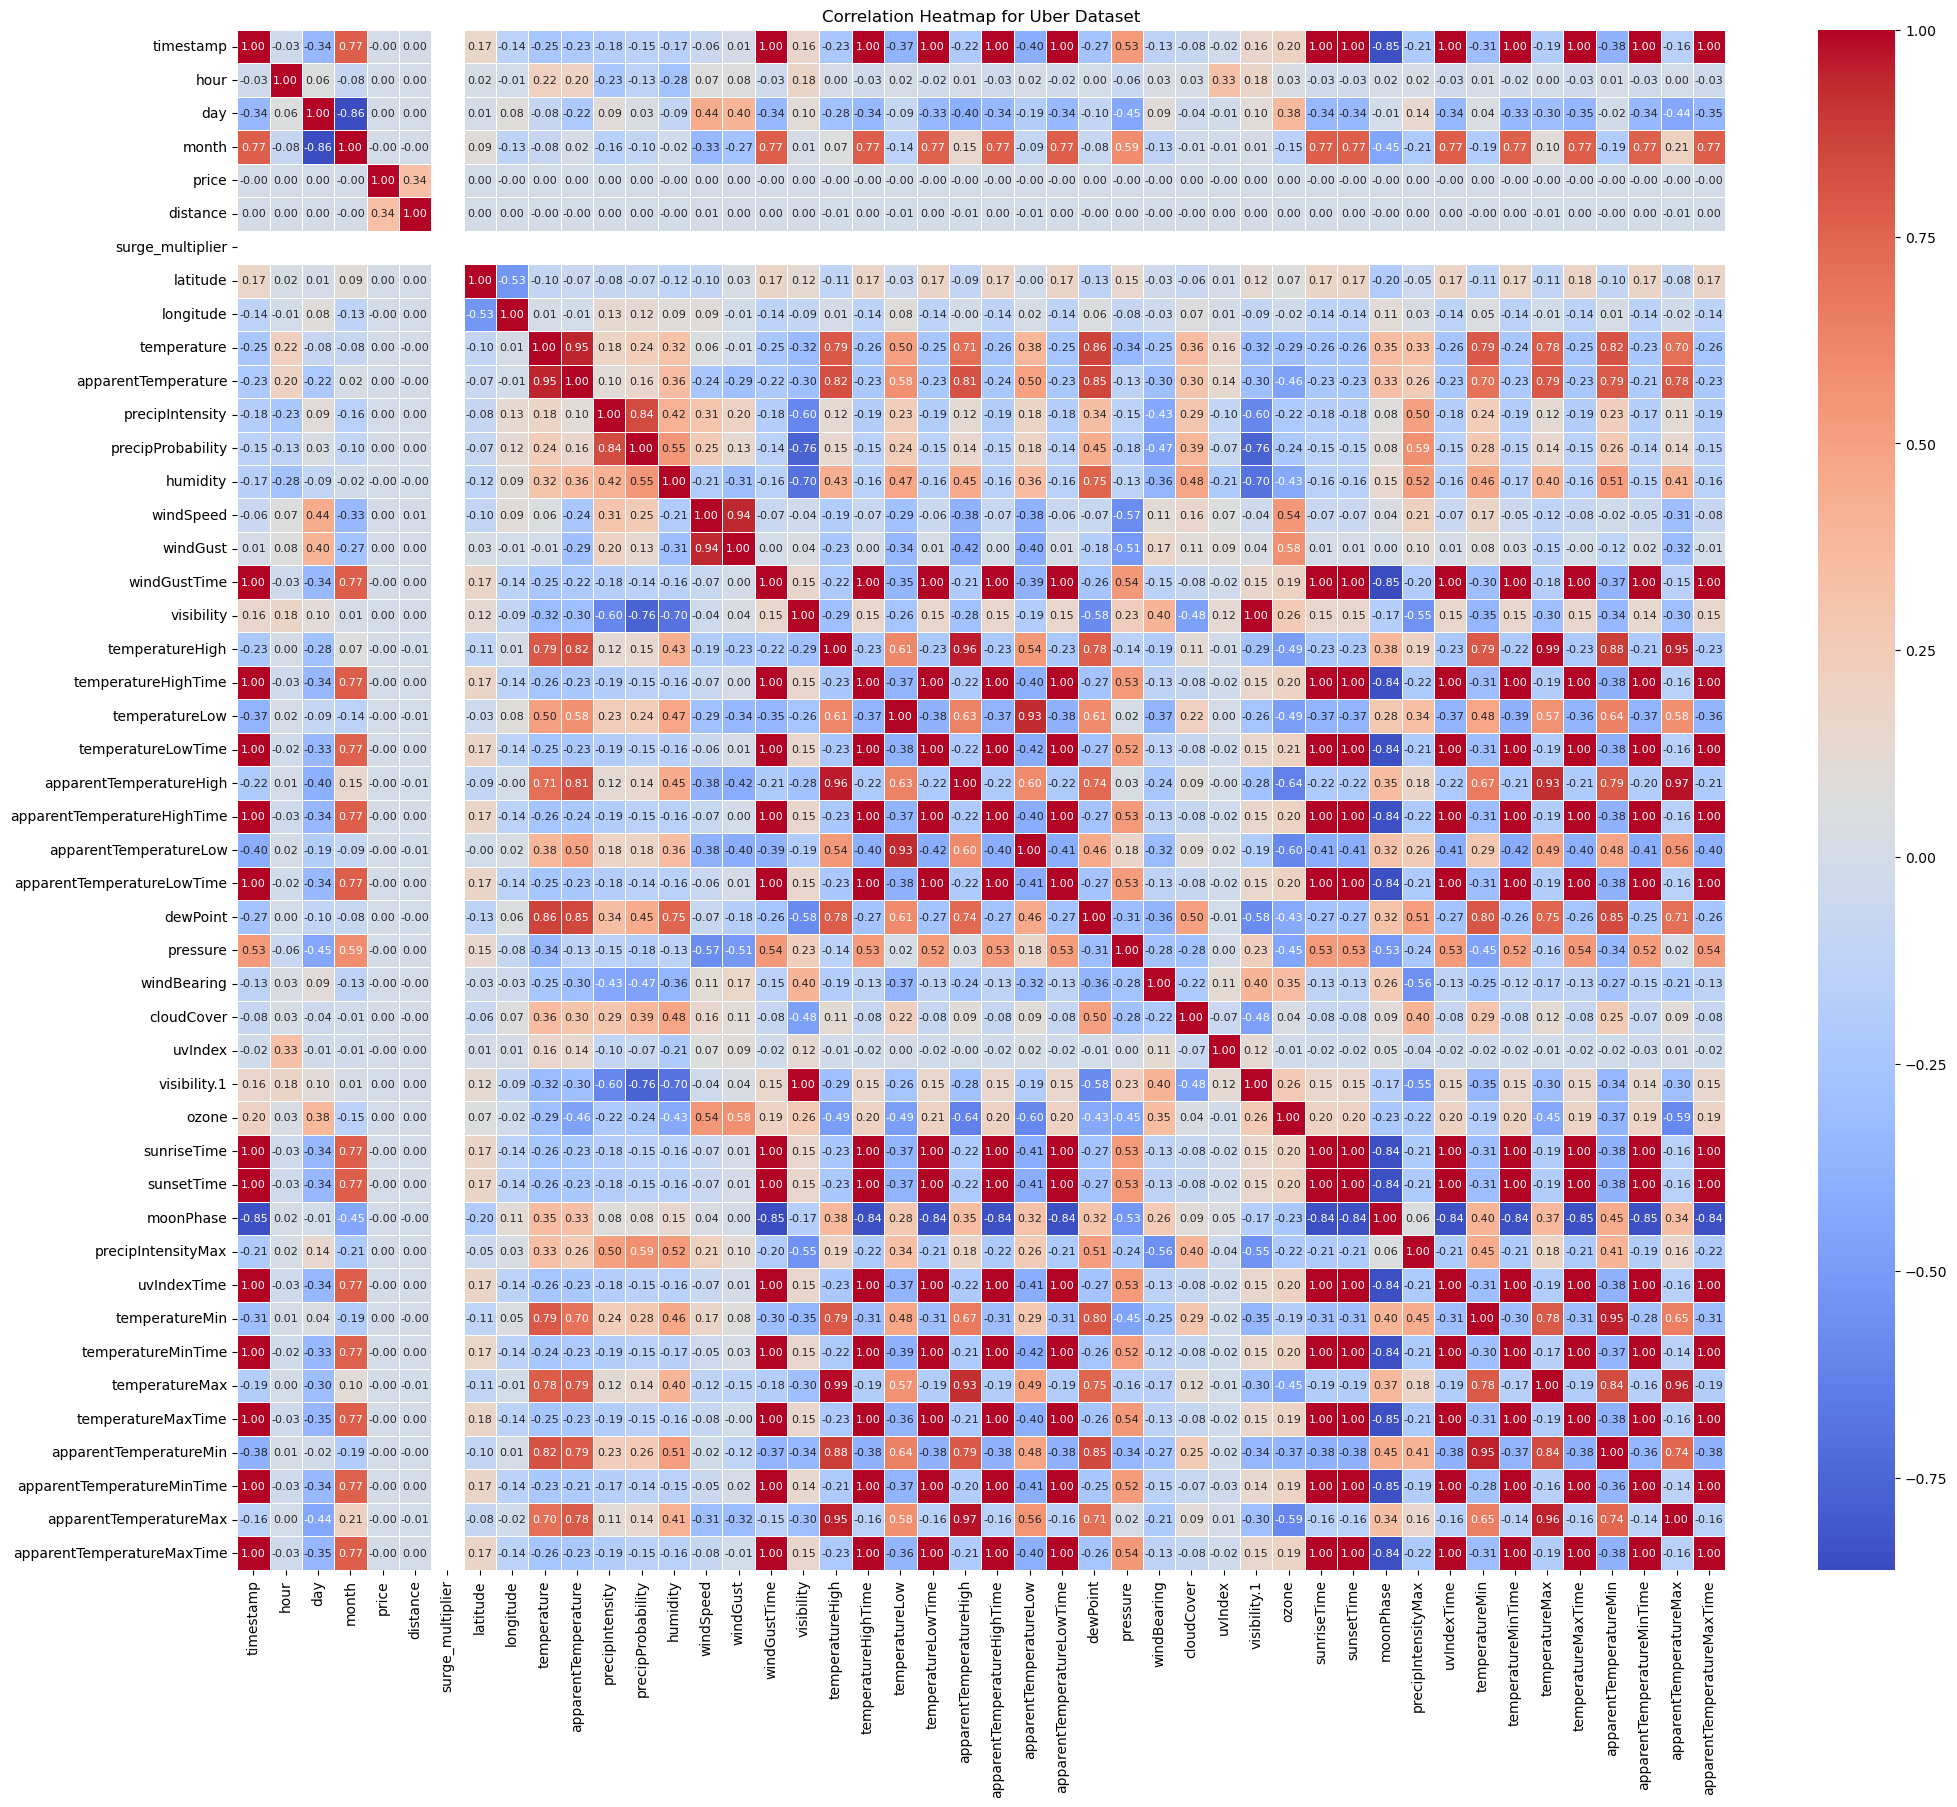

In [133]:

num_df_uber = df_uber[num_col]
correlation_matrix = num_df_uber.corr()

#Calculate correlation matrix
correlation_matrix_uber = num_df_uber.corr()

# Create a heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix_uber, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap for Uber Dataset')
plt.show()

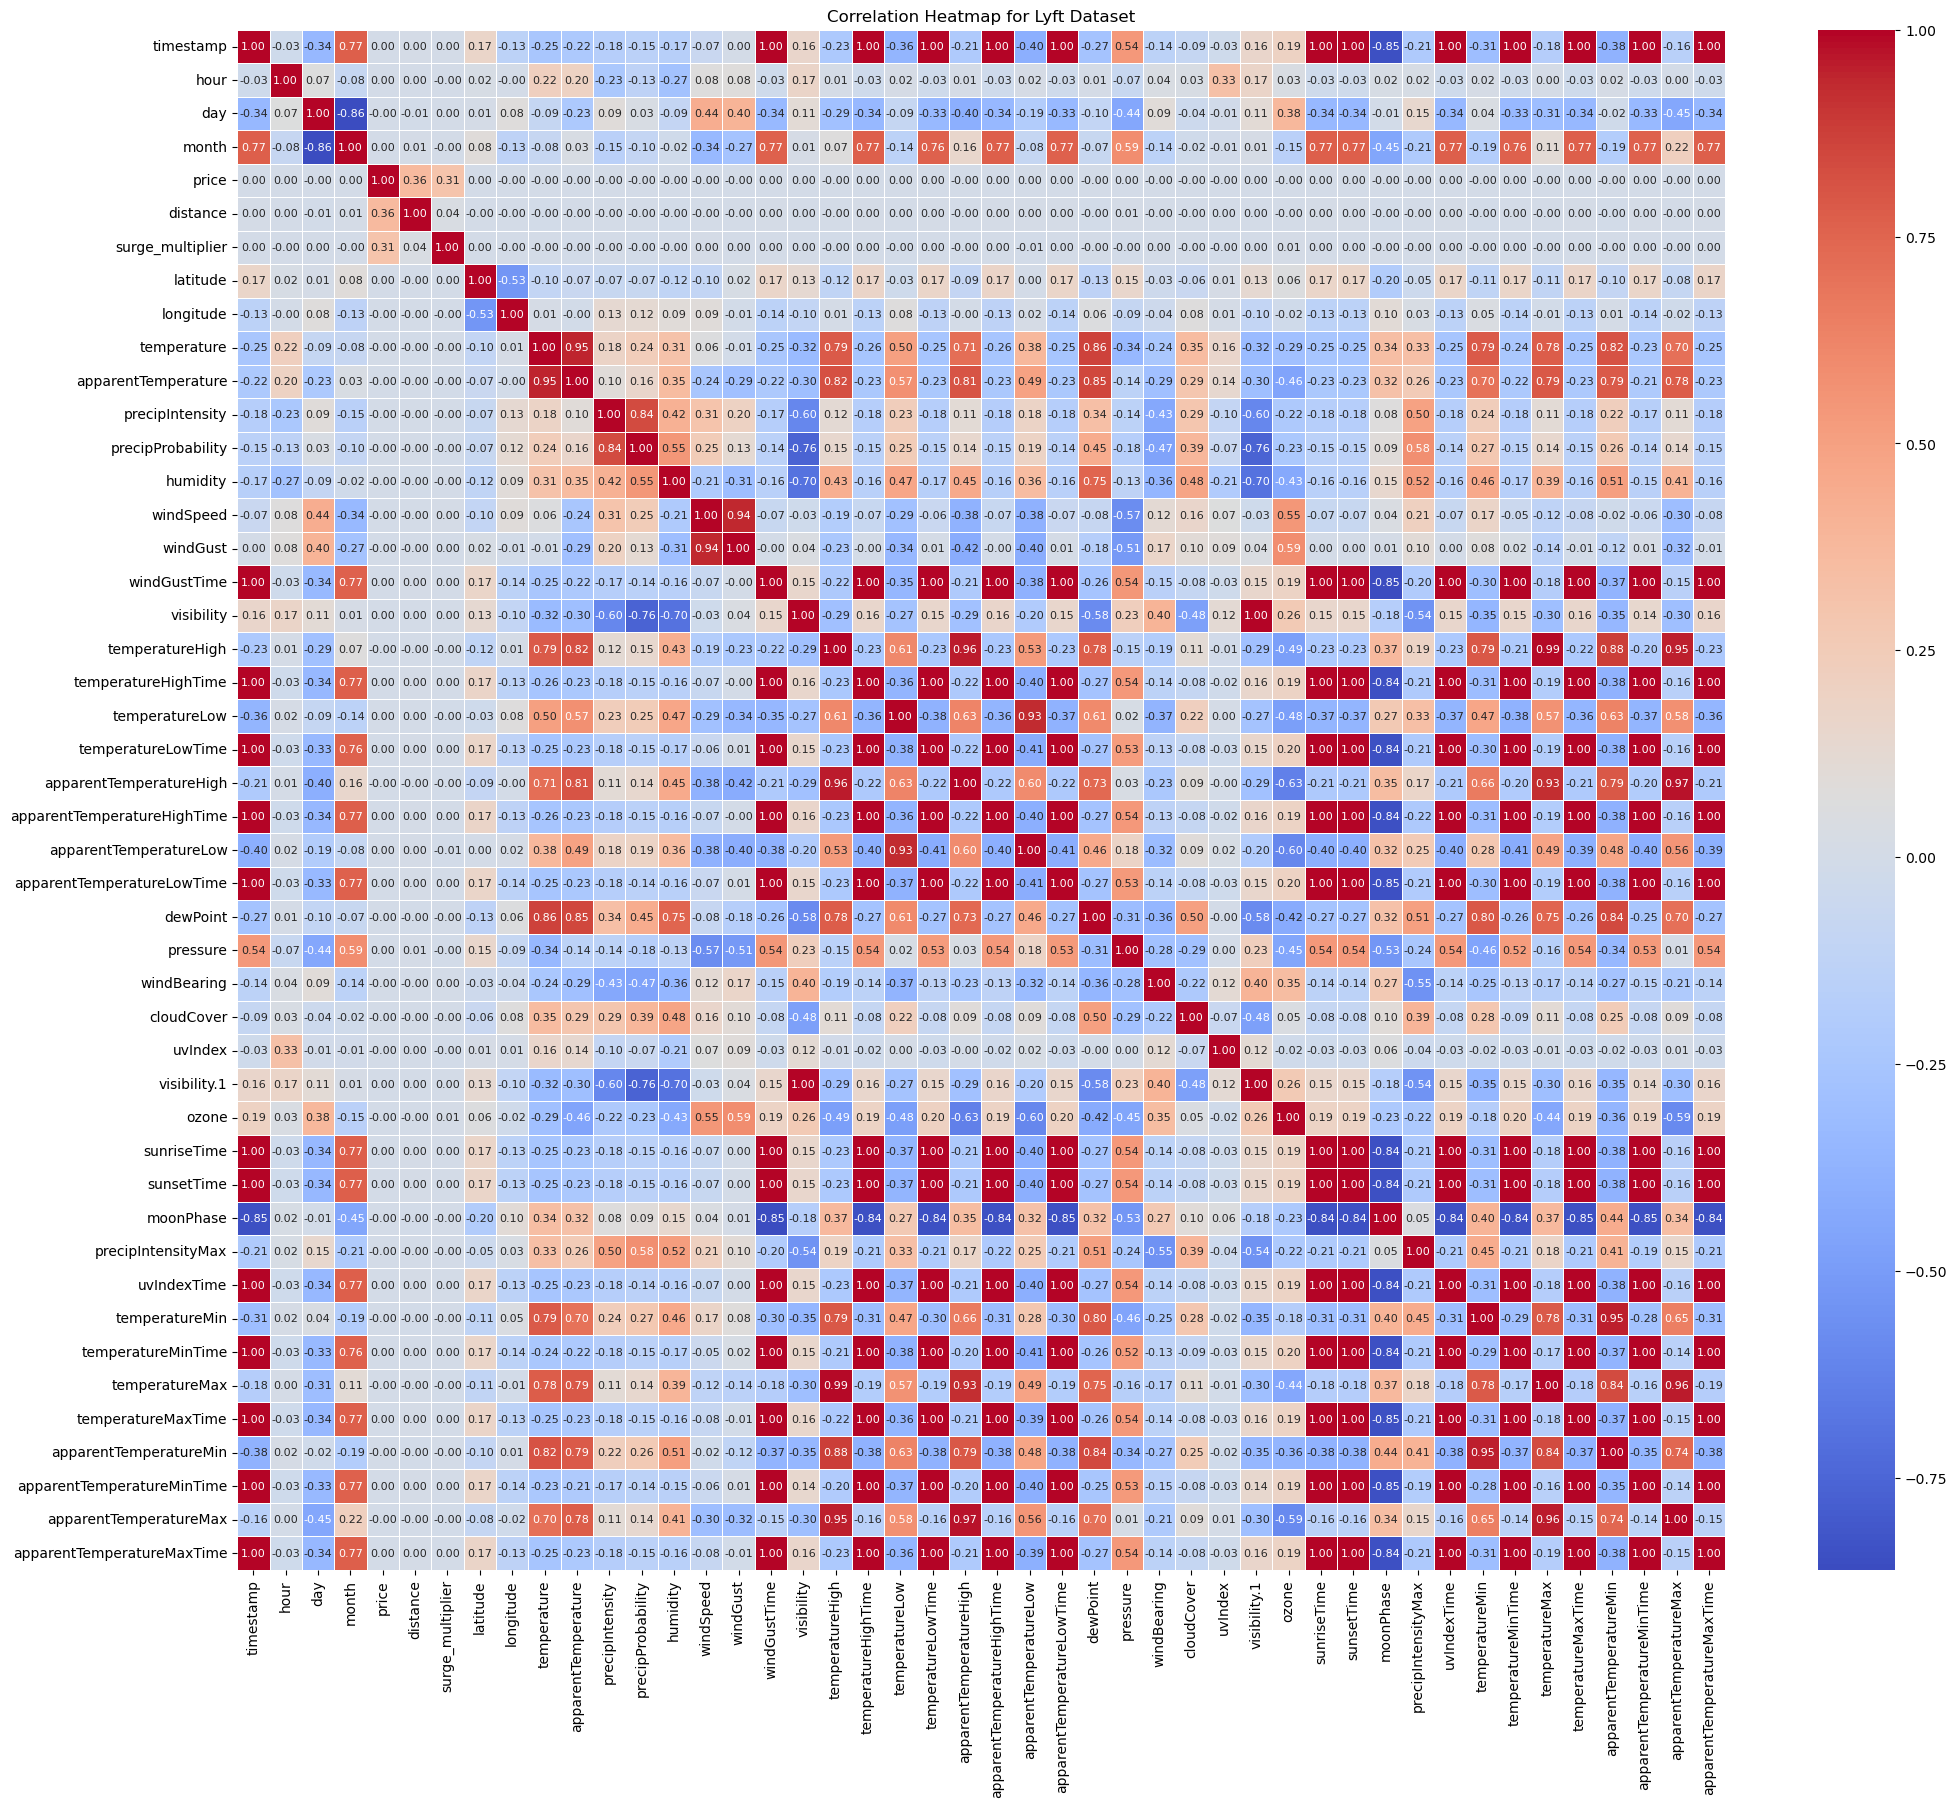

In [135]:

num_df_lyft = df_lyft[num_col]
correlation_matrix_lyft = num_df_lyft.corr()

#Calculate correlation matrix
correlation_matrix_lyft = num_df_lyft.corr()

# Create a heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix_lyft, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap for Lyft Dataset')
plt.show()

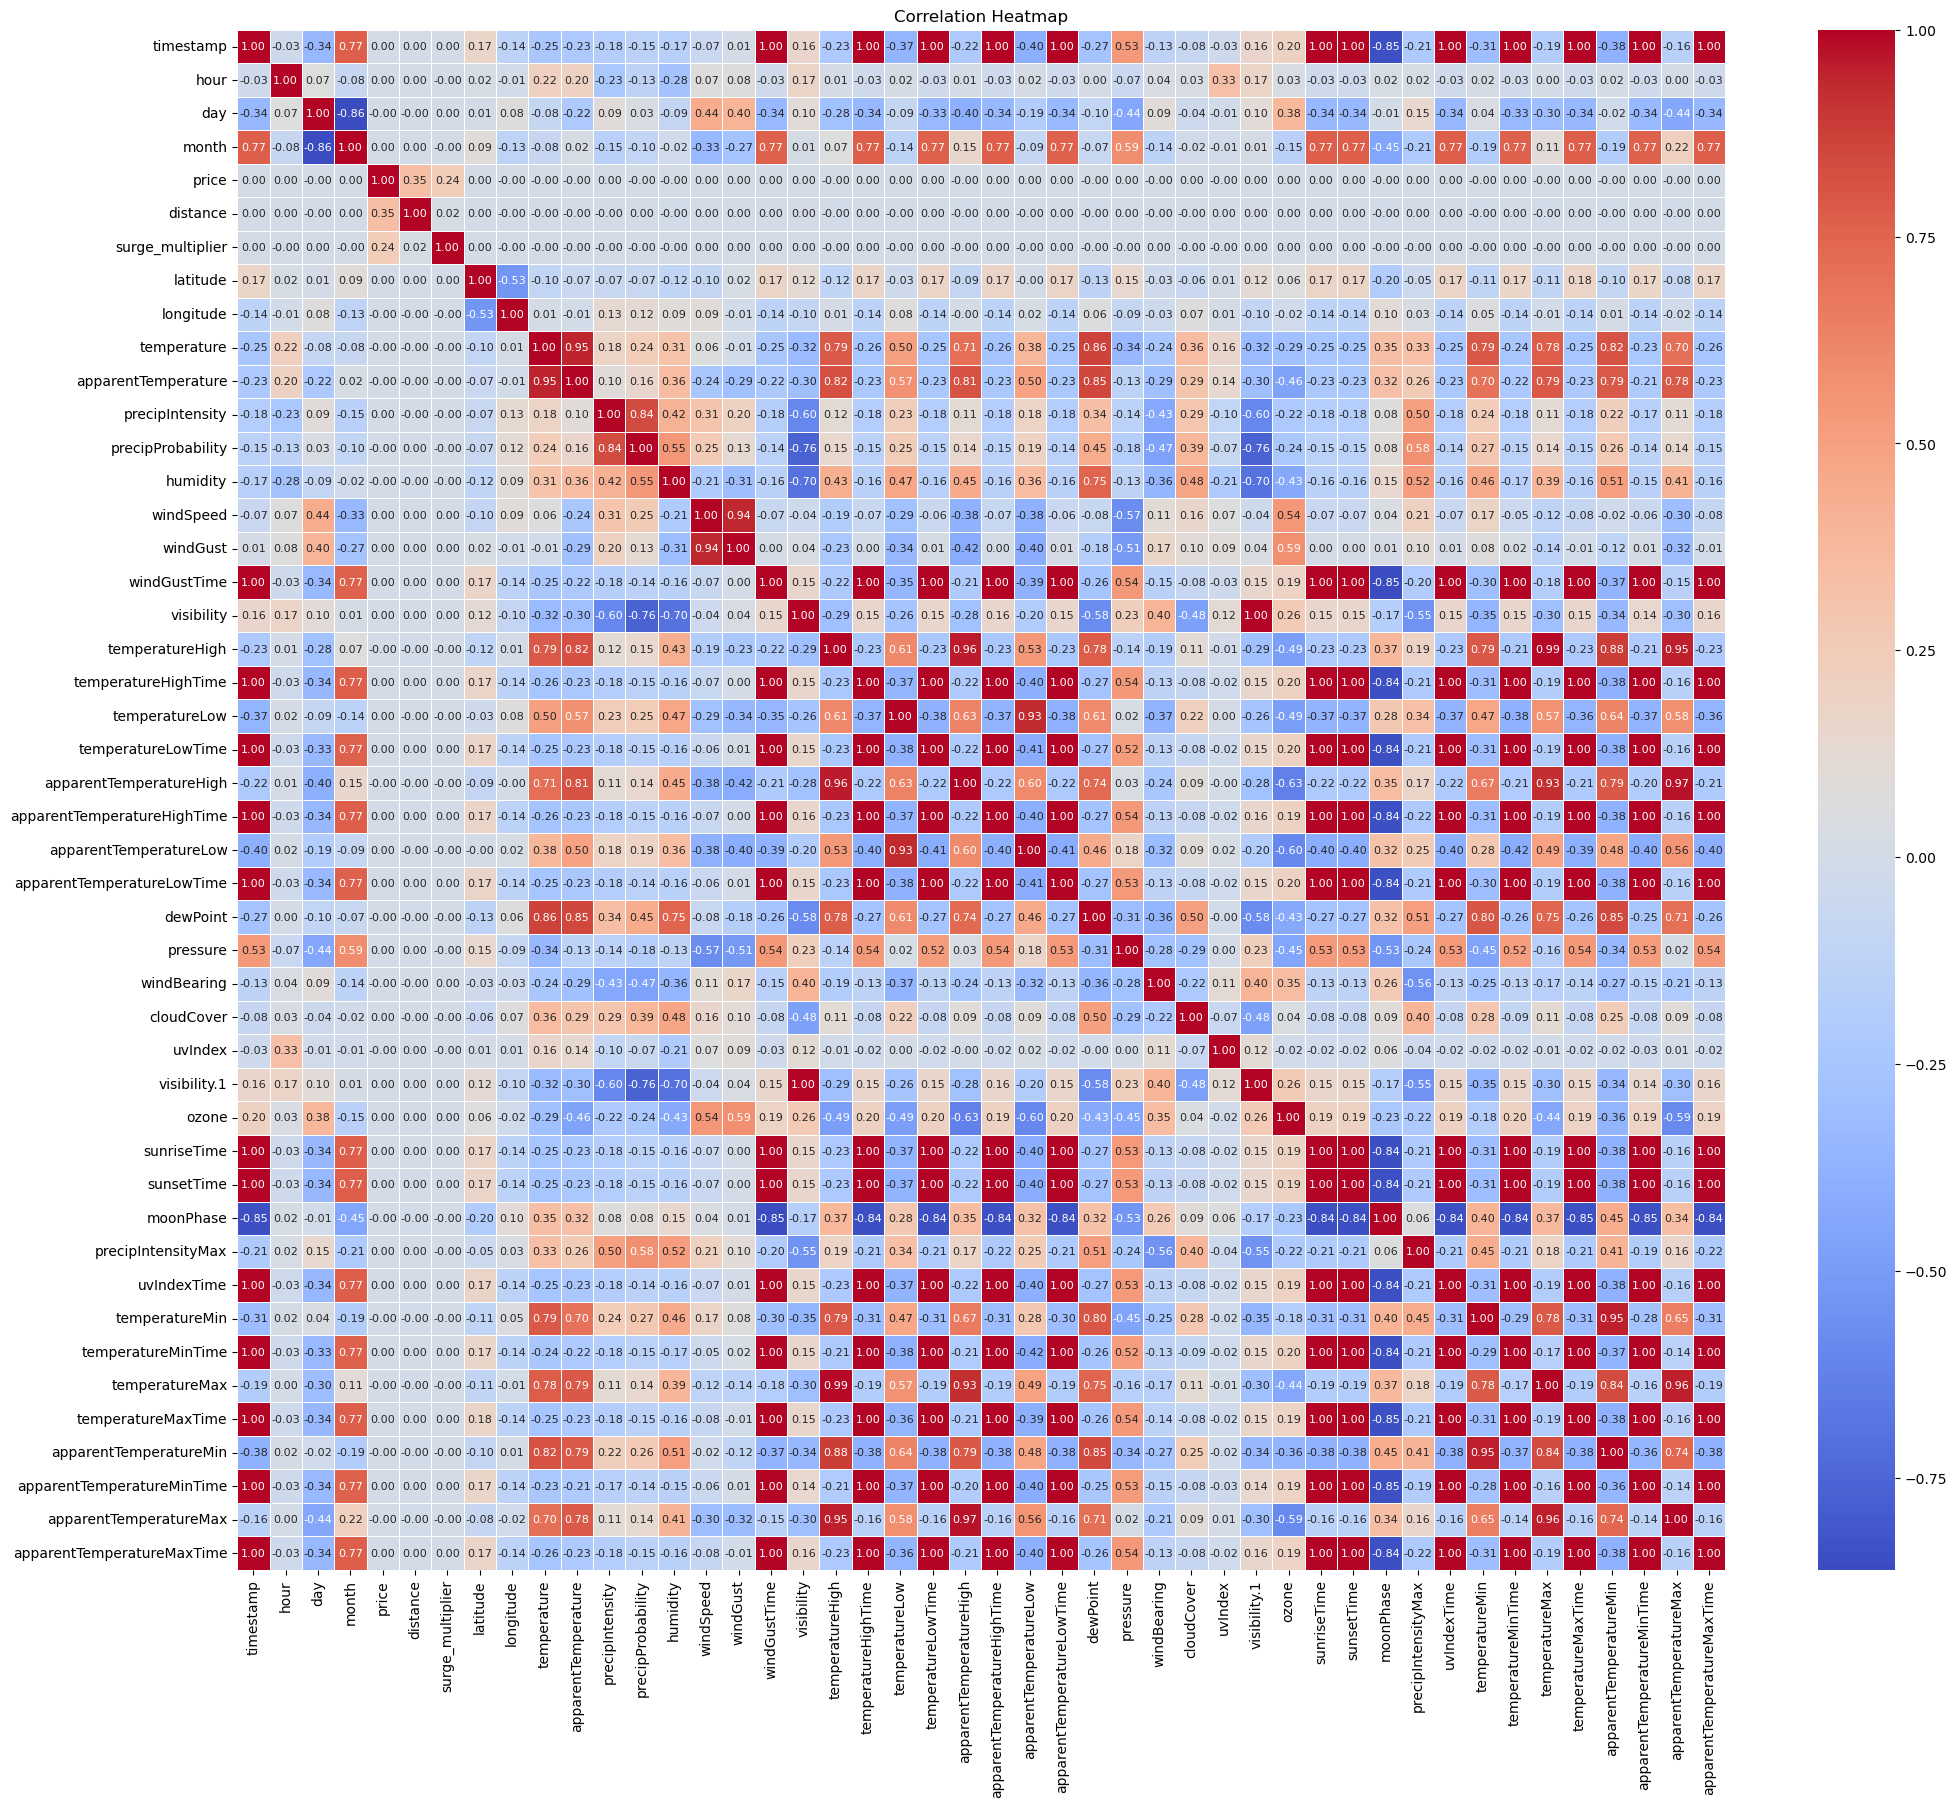

In [58]:
# Calculate correlation matrix
correlation_matrix = num_df.corr()

# Create a heatmap
plt.figure(figsize=(24, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, annot_kws={"size": 8})
plt.title('Correlation Heatmap')
plt.show()

In [59]:
num_df.corr().T.style.background_gradient()

A lot of vairables exhibit high correlation, and high correlation among variables can lead to multicollinearity, which can affect the performance and interpretability of regression models. It also indicates needs for feature engineering, and several methods we are considering to approach this problem is:
- Remove Highly Correlated Variables: Identify and drop one variable from each pair of highly correlated variables.
- Combine Variables using the average of the correlated variables or conducting Principal Component Analysis (PCA)
- Apply regularization Techniques such as L1 or L2
- Apply transformations like logarithmic or polynomial transformations to reduce correlation.
- In cases where two variables are highly correlated but both are important, we might also consider creating interaction terms to capture their joint effect.

Last but not the least, it is important to leverage domain knowledge to determine which variables are most relevant and should be retained.

In [61]:
# Potential variables to drop based on correlation threshold
threshold = 0.85
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Drop columns with high correlation
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
df_reduced = df.drop(columns=to_drop)
print(f"Dropped columns: {to_drop}")

Dropped columns: ['apparentTemperature', 'windGust', 'windGustTime', 'temperatureHighTime', 'temperatureLowTime', 'apparentTemperatureHigh', 'apparentTemperatureHighTime', 'apparentTemperatureLow', 'apparentTemperatureLowTime', 'dewPoint', 'visibility.1', 'sunriseTime', 'sunsetTime', 'uvIndexTime', 'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime', 'apparentTemperatureMin', 'apparentTemperatureMinTime', 'apparentTemperatureMax', 'apparentTemperatureMaxTime']
